**SUBMISSION INSTRUCTIONS**

It is recommendend that you make a copy of this colab file and then solve the assignment and upload your final notebook on github.

Before uploading your downloaded notebook, **RENAME** the file as **rollno_name.ipynb**

**Submission Deadline : 9/12/2025 Tuesday EOD i.e before 11:59 PM**

The deadline is strict and will not be extended, Late submissions are not allowed

Note that you have to upload your solution on the github page of the project Vision Transformer and under Week0

**Github Submission repo** -
https://github.com/electricalengineersiitk/Winter-projects-25-26/tree/main/Vision%20transformer/Week0

#**Assignment 1**
#**Section 1 (Python)**
#**Problem 1**
In this problem, you will implement a class that represents a data sample with numerical features.  
##  Problem Statement
Create a class named **`DataSample`** that stores:

- A list of numeric **features**
- A string **label**

You must implement the following **three methods** with **exact names** (do NOT rename them):

| Method | Description |
|--------|------------|
| `__init__(self, features, label)` | Initializes object attributes |
| `min_max_norm(self)` | Apply min-max normalization **in-place** |
| `scaled(self, factor)` | Return a **new list** with each feature multiplied by `factor` |

### Min–Max Normalization Formula

![Alt text for the image](https://miro.medium.com/v2/resize:fit:964/1*OnCBKS-Thqa43qNslohDpA.png)


###  Edge Case
If **all features are equal**, then max = min → division by zero.  
Handle this condition by setting all normalized values to **0**.

---

### Your output must behave conceptually like this (not real execution here):
```python
sample = DataSample([10, 20, 30], "cat")
sample.min_max_norm()
print(sample.features)   # expected -> [0.0, 0.5, 1.0]

print(sample.scaled(2))  # expected -> [0.0, 1.0, 2.0]


**Sample Class**

In [3]:
class DataSample:
    def __init__(self, features, label):
        """
        Initialize the object with feature list and label string.
        """
        self.features = list(features)
        self.label = label
        pass

    def min_max_norm(self):
        """
        Apply min-max normalization:
        Modify self.features in-place.
        Handle case where max == min.
        """
        min_val = min(self.features)
        max_val = max(self.features)
        if(min_val==max_val):
          self.features = [0.0 for _ in self.features]
        else:
          self.features = [
                (x - min_val) / (max_val - min_val) for x in self.features
            ]
        pass

    def scaled(self, factor):
        """
        Return a NEW list of features where each element is multiplied by factor.
        """
        return [x * factor for x in self.features]
        pass

You can check if your code is working correctly using the sample case below

In [4]:
sample = DataSample([3.5, -2.0, 3.5, 10.0, 0.0], "bird")

print("Original features:", sample.features)
print("Label:", sample.label)

sample.min_max_norm()
print("After min-max normalization:", sample.features)

scaled_output = sample.scaled(4.2)
print("After scaling x 4.2 (new list expected):", scaled_output)

# Expected Output:
# Original features: [3.5, -2.0, 3.5, 10.0, 0.0]
# Label: bird
# After min-max normalization: [0.4583, 0.0, 0.4583, 1.0, 0.1667]  (approx values)
# After scaling x 4.2: [1.92486, 0.0, 1.92486, 4.2, 0.70014]

Original features: [3.5, -2.0, 3.5, 10.0, 0.0]
Label: bird
After min-max normalization: [0.4583333333333333, 0.0, 0.4583333333333333, 1.0, 0.16666666666666666]
After scaling x 4.2 (new list expected): [1.925, 0.0, 1.925, 4.2, 0.7]


#**Problem 2**
Sort Based on Unique Character Count

Write a function named **`sort_by_unique_chars`** that sorts a list of strings based on the number of **unique characters** in each string (**descending** order).  
If two strings have the same number of unique characters, sort them **alphabetically**.

Assume that the characters in the words are only consisting of lower-case english alphabets

### Function Definition (DO NOT CHANGE THIS NAME)

```python
def sort_by_unique_chars(words):
    pass

In [5]:
def sort_by_unique_chars(words):
  return sorted(words, key=lambda w: (-len(set(w)), w))

check your code by running the below block

In [6]:
#example case
input_data = ["apple", "banana", "kiwi", "grape", "mango"]
output = sort_by_unique_chars(input_data)
print(output)
# Expected Output:
# ['grape', 'mango', 'apple', 'banana', 'kiwi']

['grape', 'mango', 'apple', 'banana', 'kiwi']


# **Section 2 (NumPy)**
# **Problem 1**

In this problem, you will work with NumPy arrays to practice masking, slicing, advanced indexing, and broadcasting. Follow each step sequentially using only NumPy operations (no Python loops).

## **Problem Statement**

1. **Generate** a 10×10 NumPy array `X` containing random integers between **0 and 100** (inclusive).

2. Create a **boolean mask** selecting all values between **20 and 50** (inclusive).   
   Using this mask, replace those values in `X` with **−1** *in-place*.

3. Extract a **6×6 submatrix** `sub` from the modified `X`:
   - Rows **2 to 8** ( 8 excluded )
   - Columns **3 to 9** ( 9 excluded )

4. Using **advanced NumPy indexing**, extract all **diagonal elements** of the 6×6 submatrix `sub` into a 1D array `diag_vals`.  
   *Hint: use* `np.arange(6)`.

5. Construct a **10×10 structured matrix** `M` using broadcasting, where:

    `M[i, j] = (i - j)²`

    for all `0 ≤ i, j < 10`. This must be done **without loops**.


In [8]:
import numpy as np

X = np.random.randint(0, 101, size=(10, 10))

mask = (X >= 20) & (X <= 50)

# Replace those values with -1 in-place
X[mask] = -1

sub = X[2:8, 3:9]

idx = np.arange(6)
diag_vals = sub[idx, idx]

i = np.arange(10)[:, None]   # shape (10,1)
j = np.arange(10)[None, :]   # shape (1,10)
M = (i - j) ** 2
print(M)


[[ 0  1  4  9 16 25 36 49 64 81]
 [ 1  0  1  4  9 16 25 36 49 64]
 [ 4  1  0  1  4  9 16 25 36 49]
 [ 9  4  1  0  1  4  9 16 25 36]
 [16  9  4  1  0  1  4  9 16 25]
 [25 16  9  4  1  0  1  4  9 16]
 [36 25 16  9  4  1  0  1  4  9]
 [49 36 25 16  9  4  1  0  1  4]
 [64 49 36 25 16  9  4  1  0  1]
 [81 64 49 36 25 16  9  4  1  0]]


# **Problem 2**

In this problem, you will work with NumPy arrays representing class scores for multiple samples.
You will practice row-wise normalization, broadcasting, and boolean masking.

## **Problem Statement**

1. Create a NumPy array `scores` of shape 5×4 containing integer values between **0 and 20** (inclusive).  
   Each row represents a sample, and each column represents a score for one of the 4 classes.

2. For each row in `scores`, subtract the **maximum value of that row** from all elements in that row.  
   This operation must be performed using **broadcasting** (no loops allowed).

   *Hint:*  
   `scores.max(axis=1, keepdims=True)` produces a (5×1) column of row-wise maxima.

3. Compute a new array `exp_scores` by applying the exponential function to each element:

   `exp_scores = np.exp(shifted_scores)`

4. **Normalize each row** of `exp_scores` so that each row sums to **1**.  
   Store the resulting array in `probs`.  

   The transformation is conceptually shown by the formula:

   <img src="https://miro.medium.com/v2/resize:fit:300/1*bol3L-WNVacCscvG-rlypQ.png" width="250"/>

   Which corresponds to:

   `probs[i, j] = exp_scores[i, j]/sum(exp_scores[i, :])`

5. Compute the **predicted class** for each sample by taking the index of the largest value in each row of `probs`.  
   Store this in a 1D array `y_pred` of length 5.

6. Create a NumPy array `y_true` of length 5 containing the true class labels (each between 0 and 3).

7. Create a boolean array `correct_mask` indicating whether each predicted label matches the true label.  
   Then compute the **accuracy** using:

   `accuracy = correct_mask.mean()`


In [10]:
import numpy as np

np.random.seed(0)
scores = np.random.randint(0, 21, size=(5, 4))

row_max = scores.max(axis=1, keepdims=True)
shifted_scores = scores - row_max

exp_scores = np.exp(shifted_scores)

row_sums = exp_scores.sum(axis=1, keepdims=True)
probs = exp_scores / row_sums

y_pred = probs.argmax(axis=1)

y_true = np.random.randint(0, 4, size=5)

correct_mask = (y_pred == y_true)
accuracy = correct_mask.mean()

print("scores:\n", scores)
print("\nshifted_scores:\n", shifted_scores)
print("\nprobs (softmax):\n", probs)
print("\ny_pred:", y_pred)
print("y_true:", y_true)
print("\ncorrect_mask:", correct_mask)
print("accuracy:", accuracy)


scores:
 [[12 15  0  3]
 [ 3  7  9 19]
 [18  4  6 12]
 [ 1  6  7 14]
 [17  5 13  8]]

shifted_scores:
 [[ -3   0 -15 -12]
 [-16 -12 -10   0]
 [  0 -14 -12  -6]
 [-13  -8  -7   0]
 [  0 -12  -4  -9]]

probs (softmax):
 [[4.74255818e-02 9.52568274e-01 2.91392845e-07 5.85278176e-06]
 [1.12529362e-07 6.14389498e-06 4.53975847e-05 9.99948346e-01]
 [9.97520436e-01 8.29466890e-07 6.12897738e-06 2.47260595e-03]
 [2.25750841e-06 3.35043955e-04 9.10743895e-04 9.98751955e-01]
 [9.81888870e-01 6.03293373e-06 1.79839220e-02 1.21174713e-04]]

y_pred: [1 3 0 3 0]
y_true: [1 0 3 0 3]

correct_mask: [ True False False False False]
accuracy: 0.2


#Section 3 - Pandas and MatPlotLib


#Creating Batches for Training and Testing Using Pandas

Download the following .csv file from the given link directly using commands in colab - url = "https://raw.githubusercontent.com/rashida048/Datasets/master/StudentsPerformance.csv"

In [11]:
import urllib.request
url = "https://raw.githubusercontent.com/rashida048/Datasets/master/StudentsPerformance.csv"
urllib.request.urlretrieve(url, "StudentsPerformance.csv")


('StudentsPerformance.csv', <http.client.HTTPMessage at 0x7a484d22d640>)

In [12]:
import pandas as pd

Import the csv file as a dataframe

In [13]:
df = pd.read_csv("StudentsPerformance.csv")

Write the command to be able to see the first 5 rows

In [14]:
df.head(5)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Create multiple dataframes with the following columns sorted : gender, race, math, reading and writing scores.

(meaning create df1, df2, df3 etc. with the math score sorted in df1, gender wise sorted in df2 etc.)

In [15]:
# gender
df1 = df.sort_values(by='gender')

In [16]:
# race/ethnicity
df2 = df.sort_values(by='race/ethnicity')

In [17]:
# math
df3 = df.sort_values(by='math score')

In [18]:
# reading
df4 = df.sort_values(by='reading score')

In [19]:
# writing
df5 = df.sort_values(by='writing score')

Create 2 non-overlapping dataframes test_df and train_df such that 20% of the rows are in test_df and the rest in train_df

In [20]:
test_df = df.sample(frac=0.2)
train_df = df.drop(test_df.index)

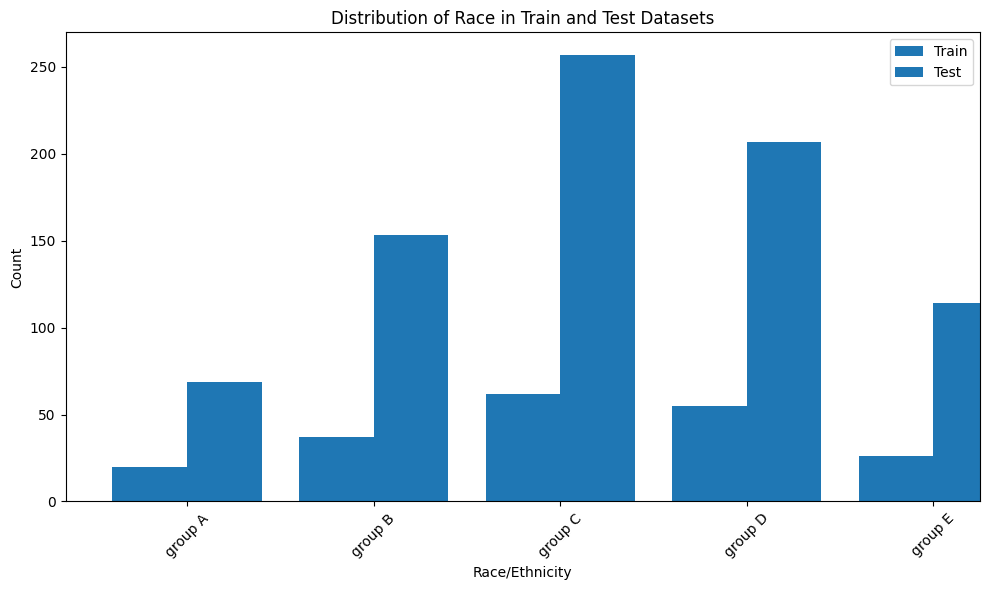

In [21]:
import matplotlib.pyplot as plt

train_counts = train_df["race/ethnicity"].value_counts().sort_index()
test_counts  = test_df["race/ethnicity"].value_counts().sort_index()

plt.figure(figsize=(10,6))

train_counts.plot(kind="bar", position=0, width=0.4, label="Train")
test_counts.plot(kind="bar", position=1, width=0.4, label="Test")

plt.xlabel("Race/Ethnicity")
plt.ylabel("Count")
plt.title("Distribution of Race in Train and Test Datasets")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Plot a bar graph such that you can see the distribution of race in test and train dataset. Are the proportions of races almost same in train and test datasets ? If not what can you do so that the proportions of races in the test and train datasets are close ?


Hint : Think Sorting on the race/ethnicity column and then applying some logic.

In [22]:
# to clarify if the split of races A, B, C, D and E are nearly say 0.2, 0.15, 0.25, 0.17, 0.23
# then I expect an almost similar split in the train_df and test_df

test_parts = []
train_parts = []

for race, group in df.groupby("race/ethnicity"):
    n_test = int(len(group) * 0.2)

    group = group.sample(frac=1, random_state=42)

    test_parts.append(group.iloc[:n_test])
    train_parts.append(group.iloc[n_test:])

test_df = pd.concat(test_parts).sample(frac=1, random_state=42)
train_df = pd.concat(train_parts).sample(frac=1, random_state=42)


Even if it the proportions are almost same think of a way to create the train_df and test_df to have similar proportions of races.

Usually when we train machine learning models we use batches. Each batch is a subset of train_df of legth batch_size. Create Batches: a list of batch each of size 50 from the train_df

In [26]:
batch_size = 50
batches = [
    train_df.iloc[i:i + batch_size]
    for i in range(0, len(train_df), batch_size)
]

Print the size of Batches and first few rows of Batches[0]

In [28]:
print(len(batches))
batches[0].head()

17


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
714,female,group B,some high school,standard,completed,60,70,74
200,female,group C,associate's degree,standard,completed,67,84,86
176,female,group B,high school,free/reduced,completed,46,54,58
646,female,group D,associate's degree,standard,none,59,70,65
840,female,group D,high school,free/reduced,none,39,52,46
